# CMPS 392 - Machine Learning 

## *Assignment 5*

##### **Mohamed Nassar, Spring 2020**

---


## Learning XOR 

Can linear regression solve the XOR problem? 

$\theta = (X^TX)^{-1}(X^Ty)$


In [0]:
import numpy as np 

x = np.array ( [ [1, 0, 1], [0, 1, 1], [0, 0, 1], [1, 1, 1]] ) 
y = np.array ( [1, 1, 0, 0] ) 

# solve using normal equations: 
x_transpose = np.transpose(x)   #calculating transpose
x_transpose_dot_x = x_transpose.dot(x)  # calculating dot product
temp_1 = np.linalg.inv(x_transpose_dot_x) #calculating inverse
temp_2 = x_transpose.dot(y) 
theta = temp_1.dot(temp_2)

theta 
# Result: w = [0,0] b = 0.5 => y = 0.5 everywhere! 

array([0.00000000e+00, 2.22044605e-16, 5.00000000e-01])

[[1 0]
 [0 1]
 [0 0]
 [1 1]]
[[1 0]
 [1 0]
 [0 0]
 [2 1]]
[1 1 0 0]


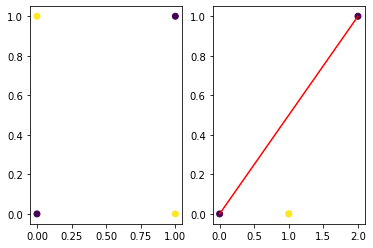

In [0]:
# solve using neural network with one hidden layer 

def g(x): 
  return np.maximum(x, 0) # relu 


x = np.array ( [ [1, 0], [0, 1], [0, 0], [1, 1]] )
print(x)
W = np.array ( [[1,1], [1,1]]); 
c = [0, -1]    
w = np.array ( [1, -2] ) 
b = 0      
h = g(x.dot(W)  + c )
print (h) 
y = h.dot(w) + b 
print (y) 

import matplotlib.pyplot as plt
plt.subplot(121)
plt.scatter (x[:,0],x[:,1],c=y) 
plt.subplot(122)
plt.scatter (h[:,0],h[:,1],c=y) 
plt.plot ([0,2],[0,1],'r-')

# Ex I 

### (a) Find W, c, w, b using gradient based learning for the above network. You can use pytorch, tensorflow, keras, or others  
### (b) have you found the same parameters as for the solution given above?
### (c) Design neural networks to model an AND gate, OR gate, NAND gate, and make them learn the weigths 

## Gradient-Based Learning 

In this exercise, we aim at learning the precision of a Conditional Gaussian distribution using a simple neural network 

We fix $x$, and generate values from $N(y, mu, sigma)$

Loss function: 
$-\frac{1}{2} log \beta + \frac{1}{2} \beta (y -\mu)^2 $ 


In [0]:
import numpy as np

import keras.backend as K
def loss(y, beta):
  return  -K.log(beta) + beta * (y - mean)**2 

# build a neural network using keras 
from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from keras.initializers import RandomUniform, RandomNormal, Zeros, Ones, Constant

model = Sequential()
# model.add(Dense(1, input_dim=1, activation='relu')) 
model.add(Dense(1, input_dim=1, activation='softplus')) # In addition, we can set kernel_initializer and bias_initializer 

# we want the network to output beta 
# important: if we use RELU, we do not want to start with a 0 gradient since we will get stuck. 
# It is important to inialize w and b (and even x) to not have wx+b < 0 as a start! 
# Another way is to use softplus since it always output a positive value 

model.summary()



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 1)                 2         
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


5.0
Weights before learning:  [[1.0865592]] [0.]
Weights after learning:  [[2.3530436]] [3.6423688]
[[5.665899]]
dict_keys(['loss'])


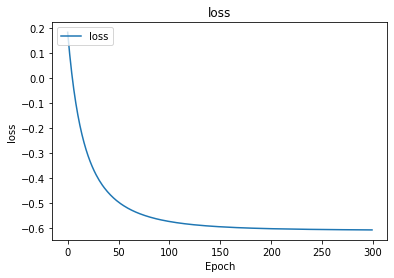

In [0]:
import math 
mean = 0
sigma = 1/math.sqrt(5)
# extrem cases to try : 
# -- sigma very large
# sigma = 1000  # precision very small => very large gradients (1/0)
# -- sigma very small 
# sigma = 0.0001 # precision very large 

true_beta= 1.0 / sigma**2 # 1 / 5 = 0.20 

x = np.random.uniform(0,1,1000)
y = np.random.normal(mean, sigma, 1000) 

print (true_beta)

# reinitialize weights
session = K.get_session()
for layer in model.layers: # 1 layer : output layer 
  if hasattr(layer, 'kernel_initializer'):
    layer.kernel.initializer.run(session=session)
  if hasattr(layer, 'bias_initializer'):
    layer.bias.initializer.run(session=session)

model.compile(loss=loss, optimizer=optimizers.sgd(lr=0.01,clipnorm=1)) #clipnorm=1 for beta very small

print ("Weights before learning: ", model.layers[0].get_weights()[0], model.layers[0].get_weights()[1])
history = model.fit(x, y, epochs=300, batch_size=64, verbose=0)
print ("Weights after learning: ", model.layers[0].get_weights()[0], model.layers[0].get_weights()[1])
res = model.predict(x[0:1]) # approximation of beta 
print (res)

import matplotlib.pyplot as plt

print (history.history.keys())
fig = plt.figure() 

plt.plot(history.history['loss'])
plt.title('loss')
plt.ylabel('loss')
plt.xlabel('Epoch')

plt.legend(['loss'], loc='upper left')
plt.show()

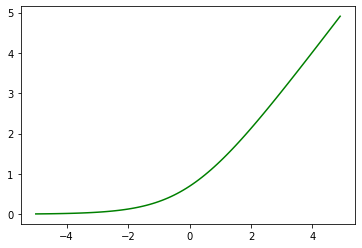

In [0]:
# why softplus? 
t = np.arange(-5., 5., 0.1)
plt.plot(t, np.log(1+np.exp(t)), 'g-')

## Ex 2 
### (a) Extend the previous exercise to a two dimensional input $(x_1, x_2)$ with two variances $(\sigma_1^2, \sigma_2^2)$.

### We assume that the input variables are not correlated.

### (b) Similar to the exercise above (gradient-based learning), design a neural network that learns the 3 means of a gaussian mixture with 3 components 

*   Assume $x$ is one dimensional
*   $p(y|x)$ is a gaussian mixture of three components 
*   Assume that the three components are equally likely
*   Assume all variances are 1 

## Hidden units 



Sigmoid vs. Hyperbolic

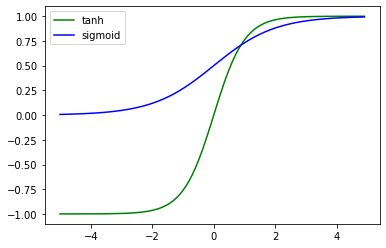

In [0]:
import numpy as np
import matplotlib.pyplot as plt

t = np.arange(-5., 5., 0.1)
plt.plot(t, np.tanh(t), 'g-', label='tanh')
plt.plot(t, 1/(1+np.exp(-t)), 'b-', label='sigmoid')
plt.legend()

Absolute value rectifier unit

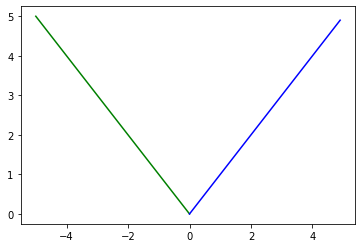

In [0]:
import numpy as np
import matplotlib.pyplot as plt

t1 = np.arange(-5., 0.1, 0.1)
t2 = np.arange(0, 5, 0.1)
plt.plot(t1, -t1, 'g-', t2, t2, 'b-')

##Backprop

Let's reconsider the problem of learning the variance, and implement gradient-based learning from scratch without recurring to Keras. It means that we have to implement forward prop and backprop. 

Loss function: 
$- log \beta + \beta (y -\mu)^2 $ 

Forward propagation: 
$$a = w x + b $$
$$ \beta = relu (a) $$
$$ L = - log \beta + \beta (y -\mu)^2 $$

Backward propagation: 
$$ \frac {\delta L } {\delta \beta} = -\frac{1}{\beta} + (y-\mu)^2  $$ 



$$ \frac {\delta L } {\delta a} =  
\begin{cases}
      \frac {\delta L } {\delta \beta} * 1  & if a > 0 \\
     \frac {\delta L } {\delta \beta} * 0 & if a < 0 \\
\end{cases}      $$



$$ \frac{\delta L } {\delta w} = \frac {\delta L } {\delta a}  x  $$ 


$$ \frac{\delta L } {\delta b} = \frac {\delta L } {\delta a} 1   $$ 






In [0]:
import math
import numpy as np 

w = 0.01 # initial w 
b = 0 # initial b 
x = 1 # input to conition on 
sigma = math.sqrt(10) # std deviation of the conditional distribution p(y|x=1)
mu = 0 # for simplicity, we take mu = 0 
true_beta = 1 / sigma**2 # true precision to guess 
eps = 0.0001 # learnign rate 
y = np.random.normal(0, sigma, 1000) # sample y from the Gaussian to use as labels 
# y

In [0]:
# implement forward propagarion 

def forward (w,b): 
  a = w * x + b 
  beta = np.maximum (a, 0)
  L = -np.log(beta) + beta * sum ( (y-mu)**2  ) /len(y) 
  return a, beta, L 

# implement backward propagarion 

def backward(beta, a):
  delta_L_to_beta =  -1/beta + sum ( (y - mu)**2 ) / len (y)  
  if a > 0: 
    delta_L_to_a = delta_L_to_beta
  else: 
    delta_L_to_a = 0
  delta_L_to_w = delta_L_to_a * x 
  delta_L_to_b = delta_L_to_a 
  return delta_L_to_w, delta_L_to_b 

# implement gradient descent
print('w \t\t\t b \t\t\t a \t\t beta \t\t true_beta')
for i in range(1000): 
  a, beta, L = forward (w,b) 
  if i%100==0: 
    print (w, b, a, beta, true_beta)
  delta_L_to_w, delta_L_to_b = backward(beta, a) 
  w = w - eps * delta_L_to_w
  b = b - eps * delta_L_to_b



w 			 b 			 a 		 beta 		 true_beta
0.01 0 0.01 0.01 0.09999999999999998
0.0523793852703444 0.0423793852703444 0.09475877054068879 0.09475877054068879 0.09999999999999998
0.05446046083942835 0.04446046083942835 0.09892092167885669 0.09892092167885669 0.09999999999999998
0.054718267549679574 0.04471826754967957 0.09943653509935915 0.09943653509935915 0.09999999999999998
0.05475158042935688 0.044751580429356876 0.09950316085871375 0.09950316085871375 0.09999999999999998
0.054755907453349364 0.04475590745334936 0.09951181490669872 0.09951181490669872 0.09999999999999998
0.054756469870038814 0.04475646987003881 0.09951293974007763 0.09951293974007763 0.09999999999999998
0.05475654297805371 0.04475654297805371 0.09951308595610742 0.09951308595610742 0.09999999999999998
0.05475655248140337 0.04475655248140337 0.09951310496280674 0.09951310496280674 0.09999999999999998
0.05475655371675065 0.04475655371675065 0.09951310743350131 0.09951310743350131 0.09999999999999998


# The problem with Relu

The network with Relu can step into regions where log is not defined 

It needs good initialization and very small learning step

For example, consider for instance the case where w = 0.1, the gradient step can easily project the b into the infeasible region 


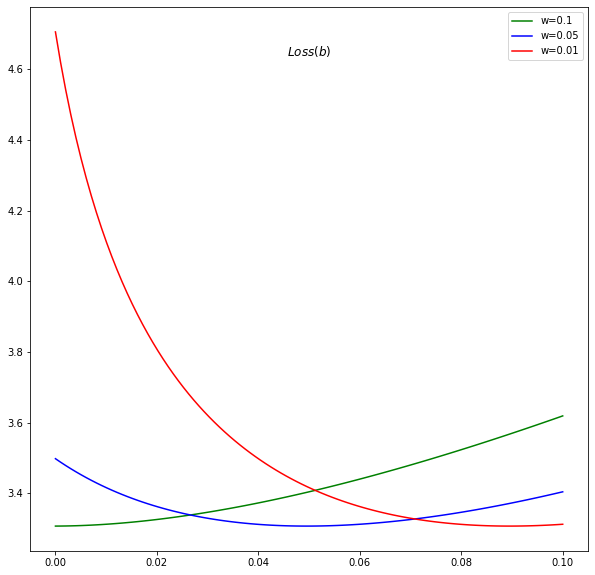

In [0]:


import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,10))

baxis = np.linspace(0.00000001, 0.1, 100)

a, beta, L = forward(0.1 * np.ones(baxis.shape),  baxis)
plt.plot(baxis, L, 'g-', label='w=0.1' )
a, beta, L = forward(0.05 * np.ones(baxis.shape),  baxis)
plt.plot(baxis, L, 'b-', label='w=0.05' )
a, beta, L = forward(0.01 * np.ones(baxis.shape),  baxis)
plt.plot(baxis, L, 'r-', label='w=0.01' )

fig.gca().set_title("$Loss (b)$", position=(0.5,0.9))
plt.legend()



# Why softmax would work?

We plot the loss function in terms of w and b when using the softplus activation

Text(0.5, 0.92, '$L_{softmax}(w,b)$  \n notice the slow descent / z-axis scale')

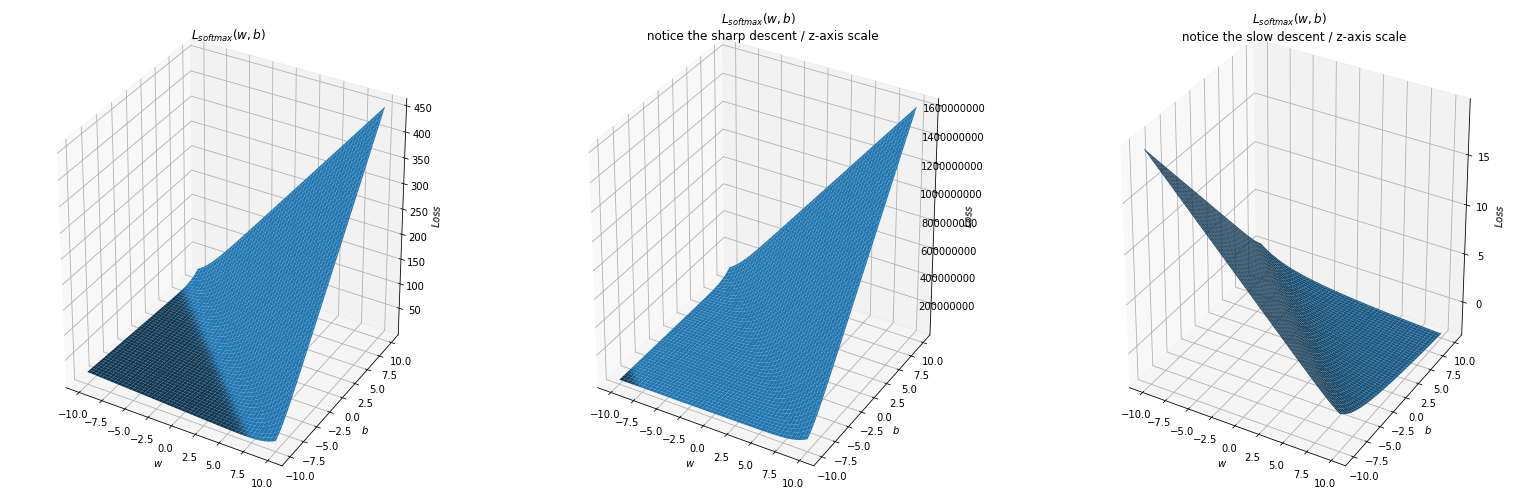

In [0]:
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline 

x = 1
mu = 0 

fig = plt.figure(figsize=(27,9))

def forward (theta, y):
  a = theta[0] * x + theta[1] 
  beta = np.log(1+np.exp(a)) # softplus
  L = -np.log(beta) + beta * (sum (y-mu)**2 /len(y)) 
  return L 

waxis = np.linspace(-10, 10, 100)
baxis = np.linspace(-10, 10, 100)
X, Y = np.meshgrid(waxis, baxis)
C = np.c_[(X.ravel(), Y.ravel())]


## Normal case: sigma is of moderate value
sigma = math.sqrt(10)
true_beta = 1 / sigma**2 
y = np.random.normal(0, sigma, 1000) 

L = np.array([forward (C[i], y) for i in range (len(C))])
L = L.reshape(X.shape)

ax = fig.add_subplot(131, projection='3d')
ax.plot_surface(X,Y,L)
ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
ax.set_zlabel('$Loss$')
# ax.set_xlim(-10,10)
# ax.set_ylim(10,-10)
ax.set_title('$L_{softmax}(w,b)$')


## Extreme case: sigma very high 
sigma = 10000 
true_beta = 1 / sigma**2 
y = np.random.normal(0, sigma, 1000) 

L = np.array([forward (C[i], y) for i in range (len(C))])
L = L.reshape(X.shape)

ax = fig.add_subplot(132, projection='3d')
ax.plot_surface(X,Y,L)
ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
ax.set_zlabel('$Loss$')
# ax.set_xlim(-10,10)
# ax.set_ylim(10,-10)
ax.ticklabel_format(style='plain')


ax.set_title('$L_{softmax}(w,b)$  \n notice the sharp descent / z-axis scale' )

## Extreme case: sigma very low 
sigma = 10**-4 
true_beta = 1 / sigma**2 
y = np.random.normal(0, sigma, 1000) 

L = np.array([forward (C[i], y) for i in range (len(C))])
L = L.reshape(X.shape)

ax = fig.add_subplot(133, projection='3d')
ax.plot_surface(X,Y,L)
ax.set_xlabel('$w$')
ax.set_ylabel('$b$')
ax.set_zlabel('$Loss$')
# ax.set_xlim(-10,10)
# ax.set_ylim(10,-10)

ax.set_title('$L_{softmax}(w,b)$  \n notice the slow descent / z-axis scale' )


## Ex 3 
(a) Implement backward propagation and gradient descent for the example with softplus 

(b) Implement forward propagation, backprop and gradient descent for part a) or part b) of Ex 2. (You choose).